# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The business goal of identifying key drivers for used car prices is reframed as a supervised machine learning problem. Specifically, it is a regression task where the target variable is the used car price. The objective is to train a model, such as a linear regression or a tree-based model (e.g., Random Forest or Gradient Boosting), using the available car features (e.g., make, model, year, mileage) as independent variables (or predictors) to accurately predict the continuous price value for any given used car and subsequently determine which features have the greatest predictive power (i.e., feature importance).

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.


# The initial Data Understanding phase will focus on:

**Data Profiling and Quality**: Checking data types, shape, and memory use; identifying duplicate records; and addressing data quality issues such as inconsistent formatting, unrealistic values (e.g., future dates, negative prices), or data entry errors.

**Missing Data**: Quantifying missing values by percentage, identifying patterns, and assessing their potential impact on the car price.

**Target Analysis **: Examining the distribution of car prices (e.g., for skewness and potential need for transformation), and identifying outliers or extreme values.

**Feature Analysis**: Separately analyzing the distributions and characteristics of both numerical features (year, odometer) and categorical features (manufacturer, model, condition, fuel, transmission), including the cardinality of categorical variables.

**Correlation**: Analyzing relationships (correlation matrix) among numerical features, identifying potential multicollinearity, and assessing how various categorical features relate to the car price.

In [19]:
# Load the dataset
import pandas as pd
df = pd.read_csv('./data/vehicles.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [20]:
#Let's do data analysis

print("Shape of the data set: ", df.shape)
# Display the first few rows to get a sense of the data
print("First 5 rows of the dataset:")
print(df.head())

# summary of the dataset
print("Dataset information:")
df.info()

# describe statistics of the dataset for numerical columns
print("Descriptive statistics for numerical columns:")
print(df.describe())

# value counts for categorical columns
print("Value counts for categorical columns:")
for col in df.select_dtypes(include='object').columns:
  print(f"{col}:")
  print(df[col].value_counts().head()) # Print top 5 value counts

# Identify missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Identify duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Shape of the data set:  (426880, 18)
First 5 rows of the dataset:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  


/tmp/ipython-input-2032443411.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2032443411.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


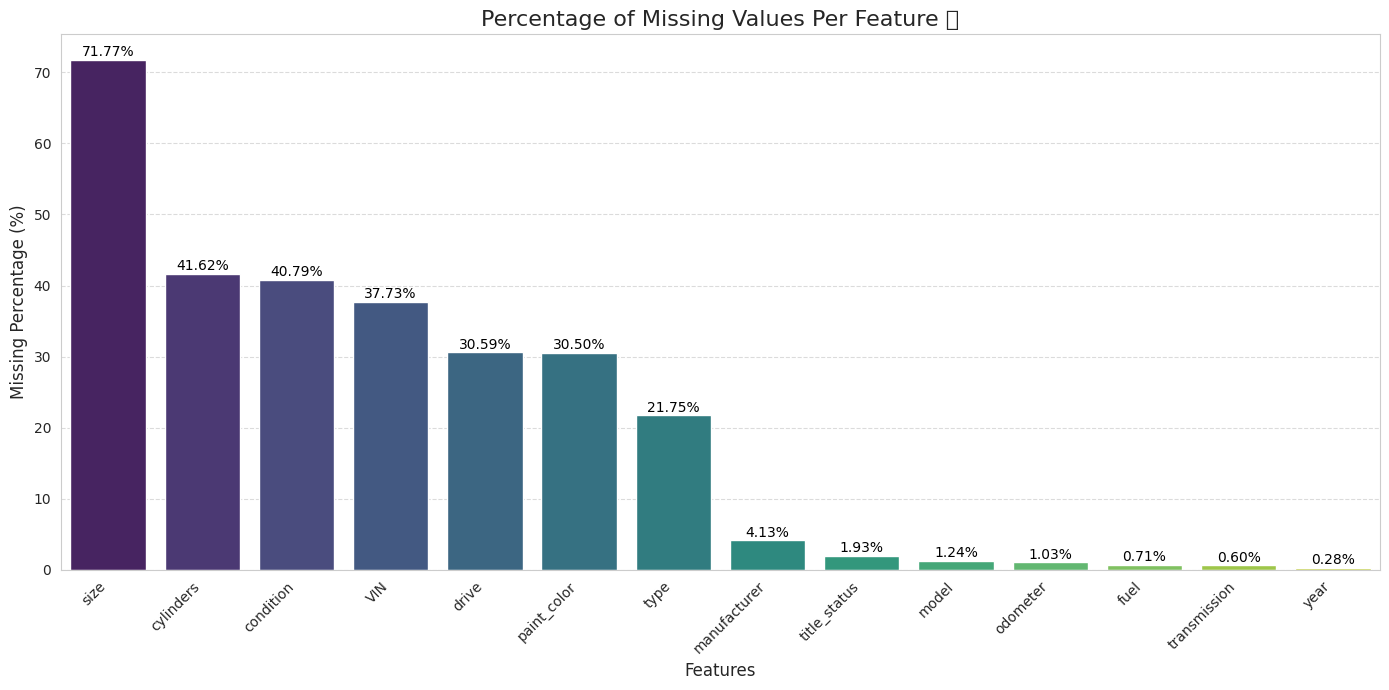


Table of Features with Missing Data:
               Missing Percentage
size                   71.767476
cylinders              41.622470
condition              40.785232
VIN                    37.725356
drive                  30.586347
paint_color            30.501078
type                   21.752717
manufacturer            4.133714
title_status            1.930753
model                   1.236179
odometer                1.030735
fuel                    0.705819
transmission            0.598763
year                    0.282281


In [21]:
#missing data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing data percentages
missing_counts = df.isnull().sum()
total_records = len(df)
missing_percentages = (missing_counts / total_records) * 100

# Filter out features with 0% missing data and sort them
missing_data_df = missing_percentages[missing_percentages > 0].sort_values(ascending=False).to_frame(name='Missing Percentage')

# 2. Visualize the missing data percentages using a bar plot
if not missing_data_df.empty:
    plt.figure(figsize=(14, 7))
    sns.barplot(
        x=missing_data_df.index,
        y='Missing Percentage',
        data=missing_data_df,
        palette="viridis"
    )

    # Add titles and labels
    plt.title('Percentage of Missing Values Per Feature 📊', fontsize=16)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Missing Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate feature names for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars with the exact percentage value
    for index, row in missing_data_df.iterrows():
        plt.text(
            index,
            row['Missing Percentage'] + 0.5, # Position text slightly above the bar
            f'{row["Missing Percentage"]:.2f}%',
            color='black',
            ha='center'
        )

    plt.tight_layout()
    plt.show()
    # plt.savefig('missing_data_percentage_plot.png') # Uncomment to save the plot

else:
    print("No missing values found in the DataFrame!")

print("\nTable of Features with Missing Data:\n", missing_data_df)

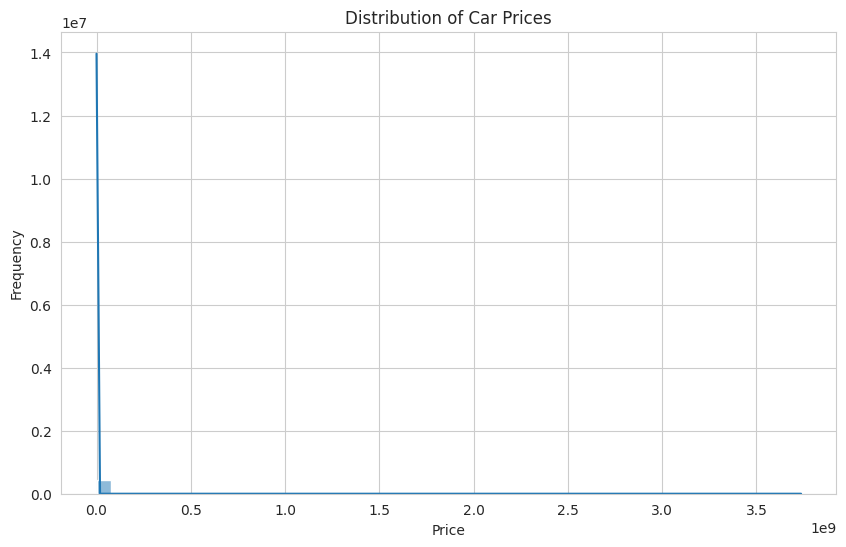

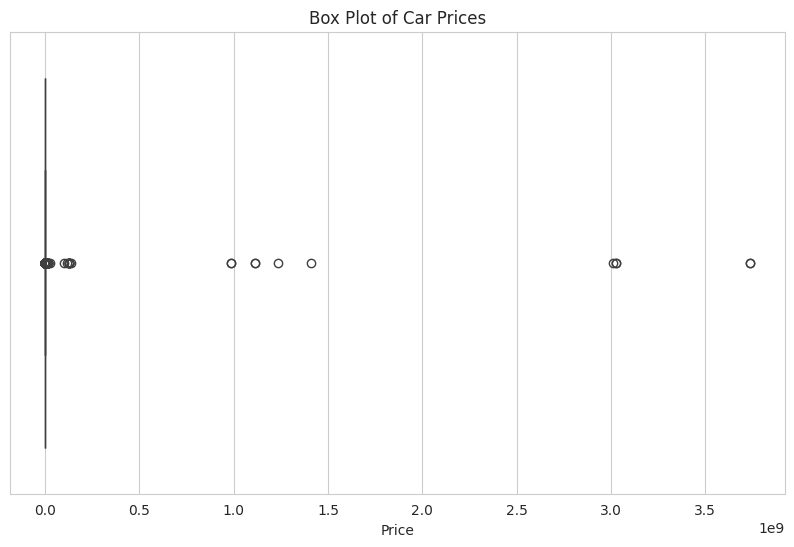

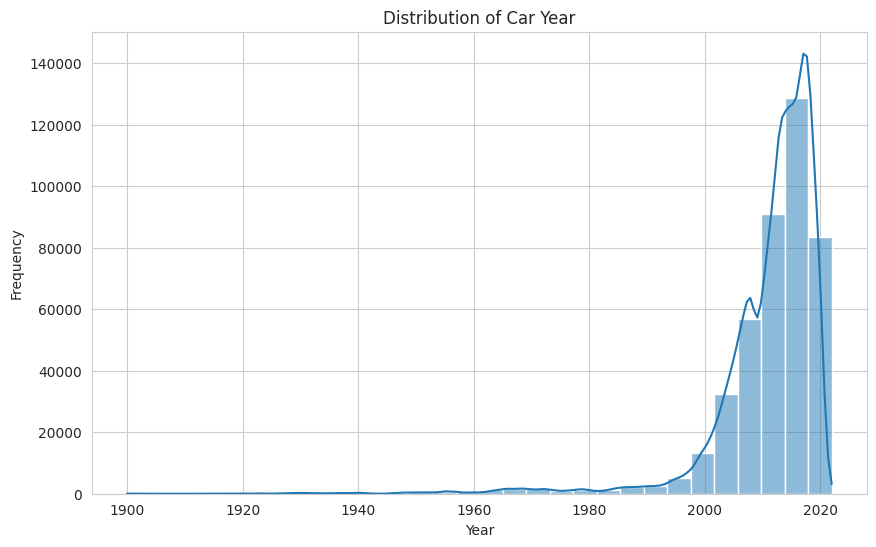

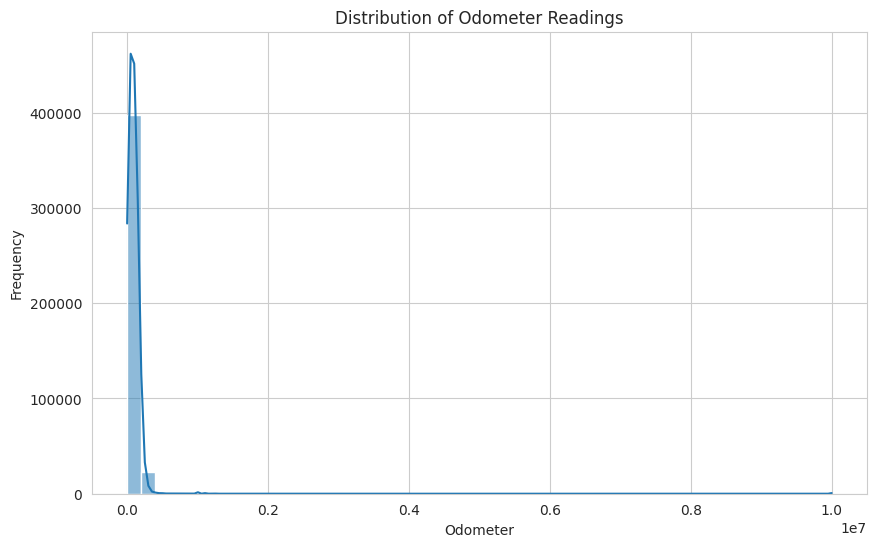

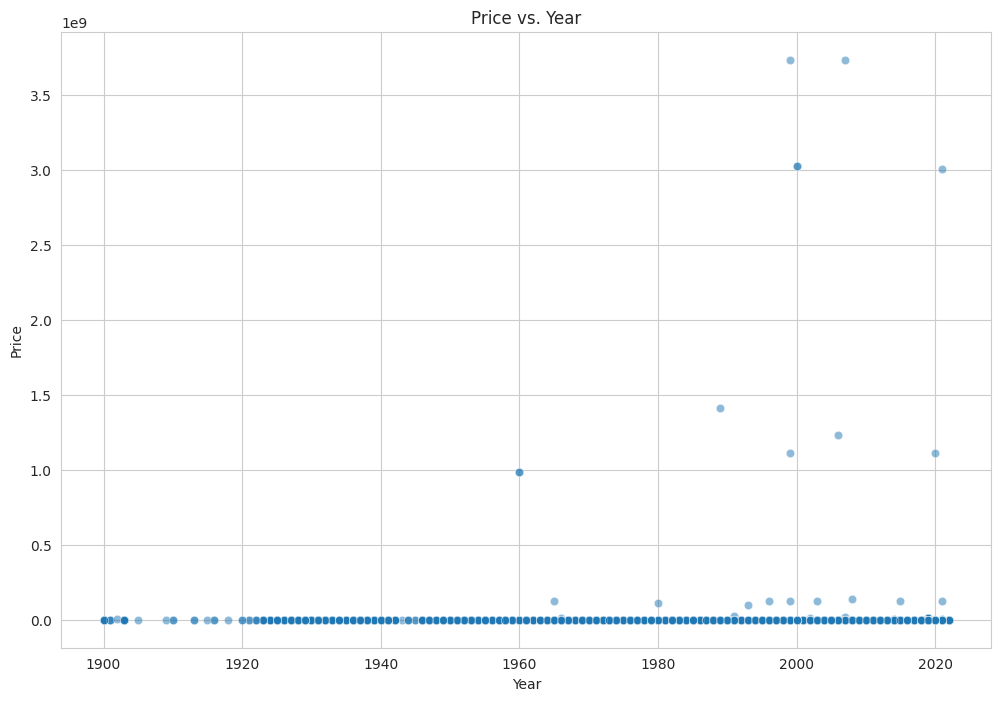

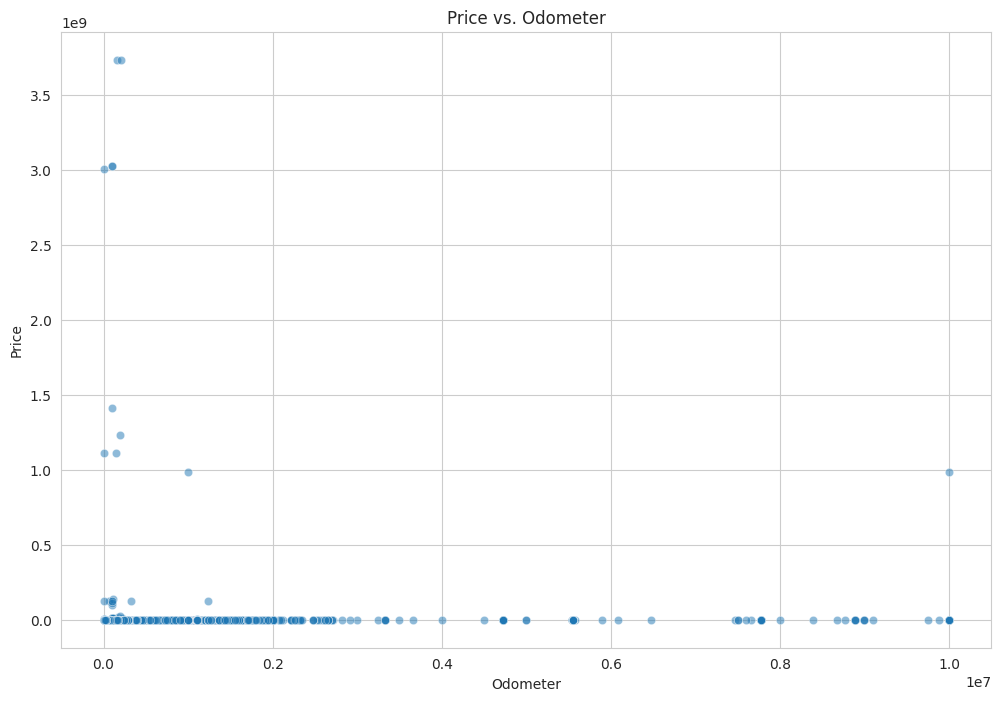

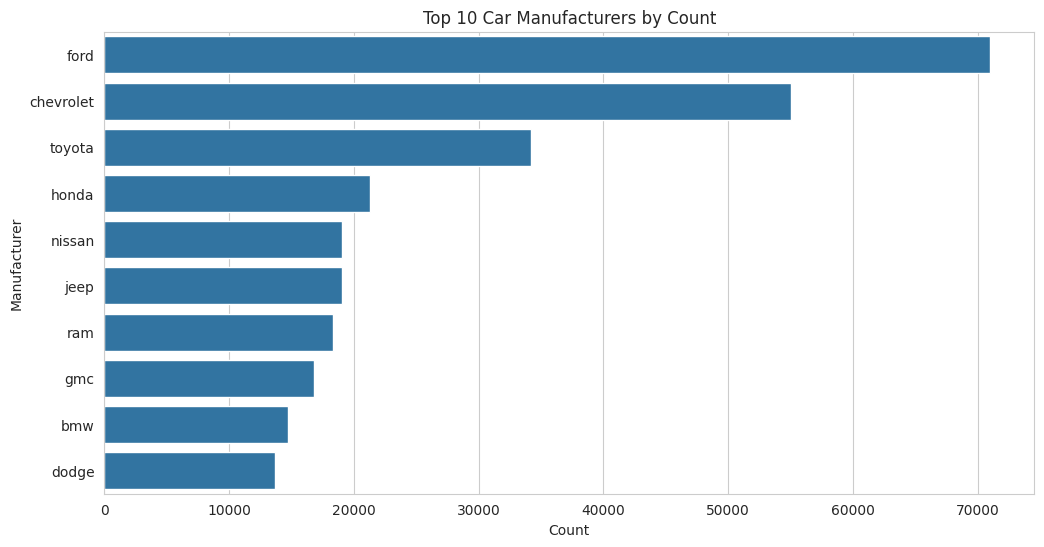

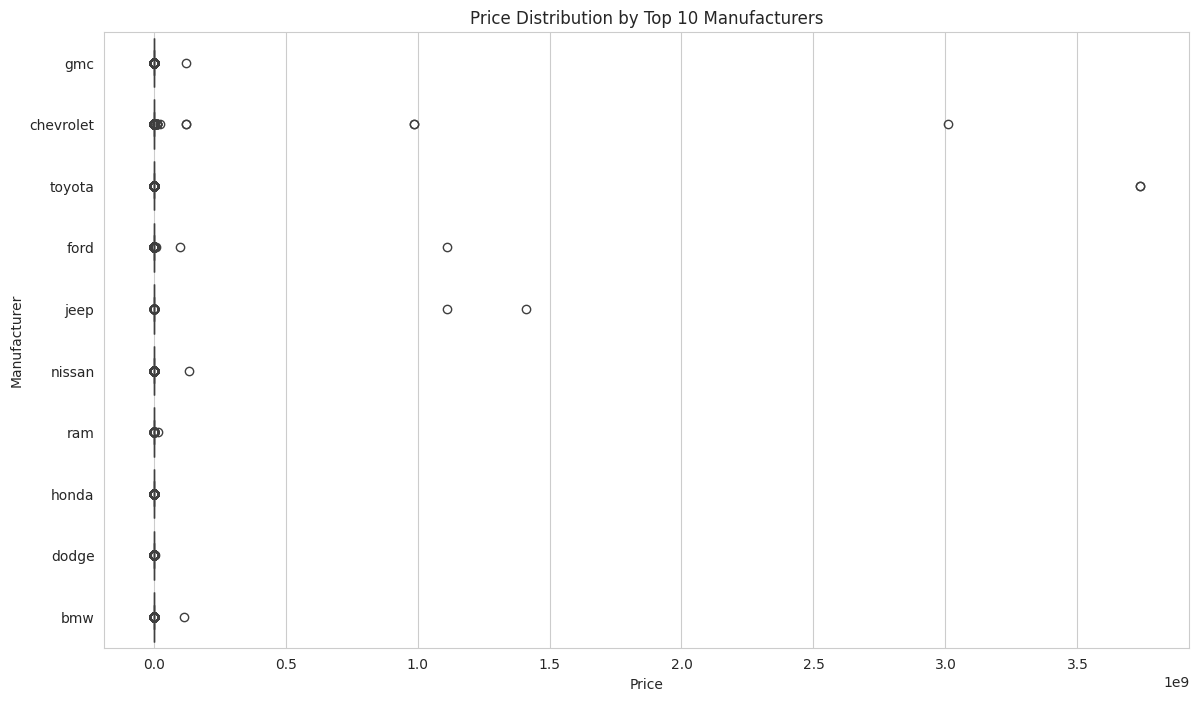

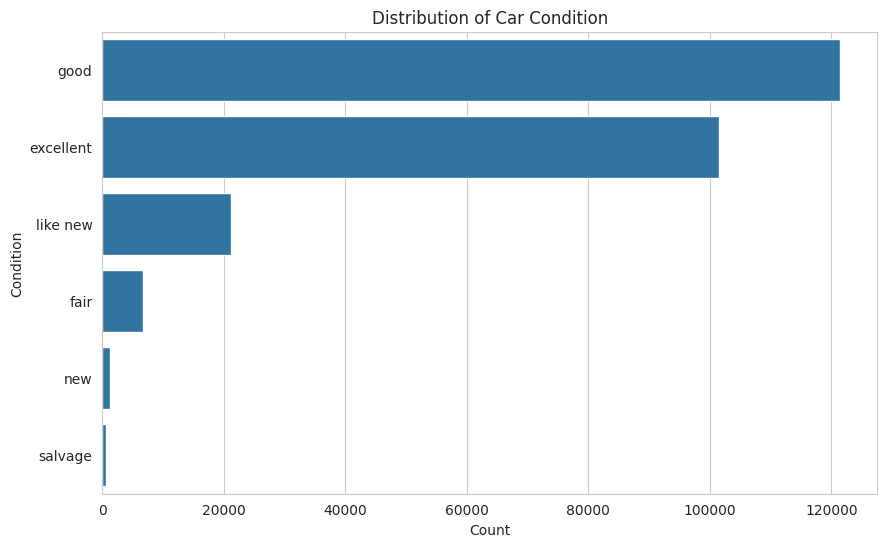

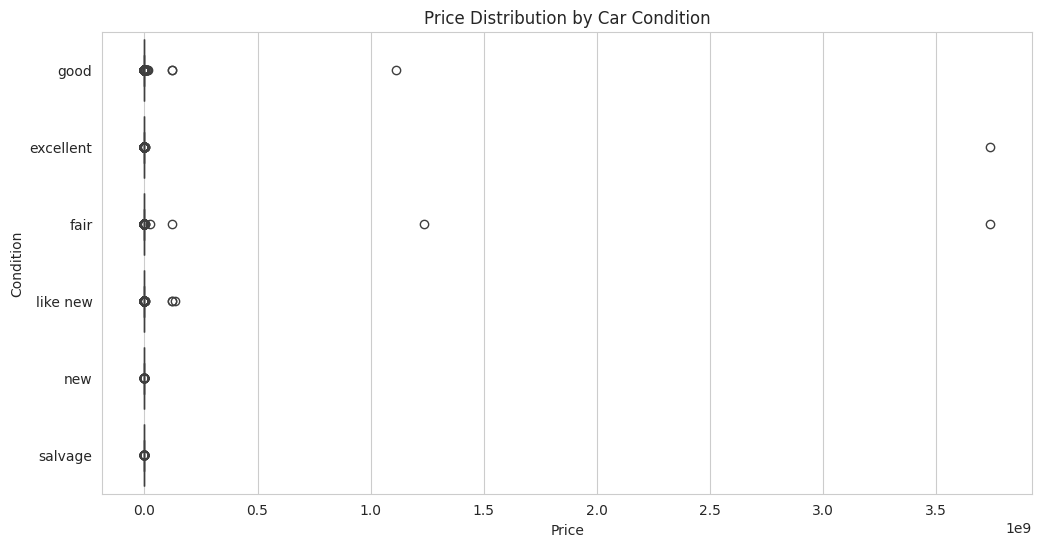

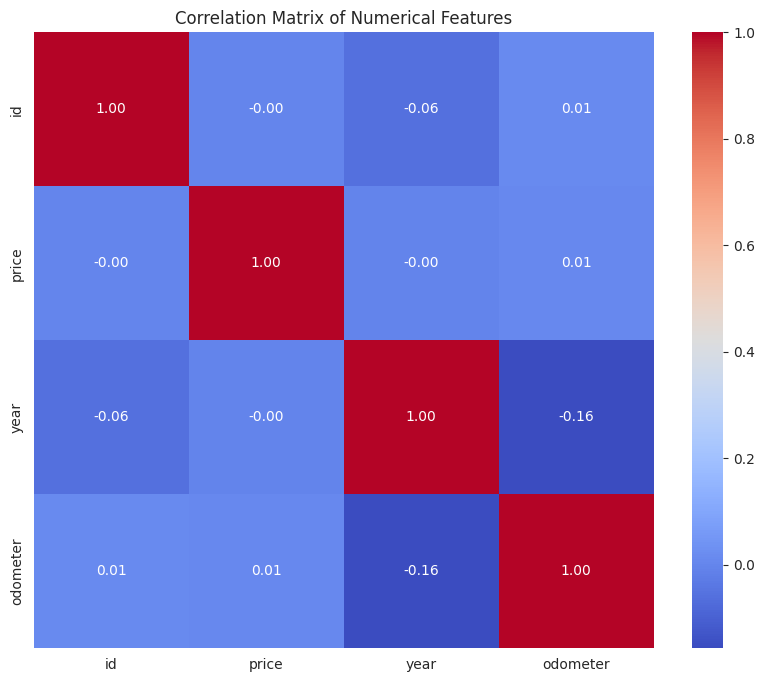

In [22]:
# --- Visualizations for Data Understanding and Quality Assessment ---

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot of Price to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()

# Distribution of Year
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=30, kde=True)
plt.title('Distribution of Car Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Distribution of Odometer
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

# Relationship between Year and Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='price', data=df, alpha=0.5)
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Relationship between Odometer and Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.5)
plt.title('Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

# Count plot for Top Makes
plt.figure(figsize=(12, 6))
sns.countplot(y='manufacturer', data=df, order=df['manufacturer'].value_counts().iloc[:10].index)
plt.title('Top 10 Car Manufacturers by Count')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

# Box plot of Price by Top Makes
plt.figure(figsize=(14, 8))
top_makes = df['manufacturer'].value_counts().nlargest(10).index
sns.boxplot(x='price', y='manufacturer', data=df[df['manufacturer'].isin(top_makes)])
plt.title('Price Distribution by Top 10 Manufacturers')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.show()

# Count plot for Car Condition
plt.figure(figsize=(10, 6))
sns.countplot(y='condition', data=df, order=df['condition'].value_counts().index)
plt.title('Distribution of Car Condition')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

# Box plot of Price by Car Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='condition', data=df)
plt.title('Price Distribution by Car Condition')
plt.xlabel('Price')
plt.ylabel('Condition')
plt.show()

# Heatmap of correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()




### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

# Highlevel Data Preparation steps:

**Data Cleaning**: Remove records with a missing target, correct unrealistic values, and remove extreme outliers.

**Missing Value Handling**: Impute remaining missing values using methods like median/mode or 'unknown' categories.

**Feature Engineering**: Create new features, such as vehicle age, and extract meaning from high-cardinality features.

**Transformation & Scaling**: Apply log transformations to skewed variables and standardize numerical features.

**Categorical Encoding**: Convert categorical features into numerical formats using One-Hot or Target Encoding.

**Feature Selection**: Reduce dimensionality by removing highly correlated features and selecting the most important predictors.

**Data Splitting**: Divide the final dataset into Training, Validation, and Test sets

In [23]:
# Create a copy of the dataset for preparation
df_clean = df.copy()
print(f"Starting with {len(df_clean)} records")

# 1. Data Cleaning
print("\n Data Cleaning")

# Clean records with missing price
df_clean = df_clean.dropna(subset=['price'])
print(f"After cleaned missing prices: {len(df_clean)} records")

# Clean unrealistic prices
df_clean = df_clean[(df_clean['price'] > 0) & (df_clean['price'] < 500000)]
print(f"After cleaned unrealistic prices: {len(df_clean)} records")

# Clean unrealistic years
df_clean = df_clean[(df_clean['year'] >= 1990) & (df_clean['year'] <= 2025)]
print(f"After cleaned unrealistic years: {len(df_clean)} records")

# Remove extreme outliers using IQR method
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR  # Using 3*IQR for less aggressive outlier removal
upper_bound = Q3 + 3 * IQR
df_clean = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]
print(f"After removing extreme price outliers: {len(df_clean)} records")

Starting with 426880 records

 Data Cleaning
After cleaned missing prices: 426880 records
After cleaned unrealistic prices: 393917 records
After cleaned unrealistic years: 380619 records
After removing extreme price outliers: 379771 records


In [25]:
# Handle Missing Values
print("\n Handle missing values... ")

# Check missing values after cleaning
missing_after_clean = df_clean.isnull().sum()
print("Missing values after initial cleaning:")
print(missing_after_clean[missing_after_clean > 0])

# Handle categorical missing values
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                   'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna('unknown')

# Handle numerical missing values
if 'odometer' in df_clean.columns:
    # Fill missing odometer with median grouped by year
    df_clean['odometer'] = df_clean.groupby('year')['odometer'].transform(
        lambda x: x.fillna(x.median())
    )
    # If still missing, fill with overall median
    df_clean['odometer'] = df_clean['odometer'].fillna(df_clean['odometer'].median())

print(f"\nFinal Missing values:")
print(df_clean.isnull().sum().sum())


 Handle missing values... 
Missing values after initial cleaning:
VIN    141297
dtype: int64

Final Missing values:
141297


In [27]:
# Feature Selection
print("\n Feature selection ")

# Create vehicle age
df_clean['age'] = 2025 - df_clean['year']
print(f"Created 'age' feature: {df_clean['age'].describe()}")

# Create age bins
df_clean['age_group'] = pd.cut(df_clean['age'],
                              bins=[0, 3, 7, 15, 100],
                              labels=['New (0-3)', 'Recent (4-7)', 'Mature (8-15)', 'Old (15+)'])

# Create mileage bins (if odometer exists)
if 'odometer' in df_clean.columns:
    df_clean['mileage_group'] = pd.cut(df_clean['odometer'],
                                      bins=[0, 30000, 75000, 150000, float('inf')],
                                      labels=['Low (<30k)', 'Medium (30k-75k)',
                                             'High (75k-150k)', 'Very High (150k+)'])

# Create luxury brand indicator
luxury_brands = ['bmw', 'mercedes-benz', 'audi', 'lexus', 'acura', 'infiniti',
                'cadillac', 'lincoln', 'volvo', 'jaguar', 'porsche', 'tesla']
df_clean['is_luxury'] = df_clean['manufacturer'].str.lower().isin(luxury_brands)

# Create fuel efficiency indicator
efficient_fuels = ['hybrid', 'electric']
df_clean['is_efficient'] = df_clean['fuel'].str.lower().isin(efficient_fuels)

print(f"Luxury cars: {df_clean['is_luxury'].sum()} ({df_clean['is_luxury'].mean()*100:.1f}%)")
print(f"Efficient cars: {df_clean['is_efficient'].sum()} ({df_clean['is_efficient'].mean()*100:.1f}%)")


 Feature selection 
Created 'age' feature: count    379771.000000
mean         12.705986
std           5.827241
min           3.000000
25%           8.000000
50%          12.000000
75%          16.000000
max          35.000000
Name: age, dtype: float64
Luxury cars: 65963 (17.4%)
Efficient cars: 6481 (1.7%)


In [28]:
# Encoding
print("\n Let's encode the data.. ")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

df_encoded = df_clean.copy()

# one-hot encoding
low_cardinality_cols = []
for col in categorical_cols:
    if col in df_encoded.columns and df_encoded[col].nunique() <= 10:
        low_cardinality_cols.append(col)

print(f"Low cardinality features : {low_cardinality_cols}")

# One-hot encode low cardinality features
df_encoded = pd.get_dummies(df_encoded, columns=low_cardinality_cols, prefix=low_cardinality_cols)

# High cardinality features for target encoding
high_cardinality_cols = []
for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].nunique() > 10:
        high_cardinality_cols.append(col)

print(f"High cardinality features : {high_cardinality_cols}")

# Target encoding for high cardinality features
for col in high_cardinality_cols:
    if col in df_clean.columns:
        # Calculate mean price for each category
        target_mean = df_clean.groupby(col)['price'].mean()
        # Map to new column
        df_encoded[f'{col}_target_encoded'] = df_clean[col].map(target_mean)
        # Fill any missing values with overall mean
        df_encoded[f'{col}_target_encoded'] = df_encoded[f'{col}_target_encoded'].fillna(df_clean['price'].mean())
        # Drop original column
        df_encoded = df_encoded.drop(columns=[col])

print(f"\nFinal encoded dataset shape : {df_encoded.shape}")


 Let's encode the data.. 
Low cardinality features : ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size']
High cardinality features : ['manufacturer', 'model', 'type', 'paint_color']

Final encoded dataset shape : (379771, 58)


In [29]:
# Scale and transform the features
print("\n Scale and transform the features ")

# Identify numerical features for scaling
numerical_features = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
# Remove target variable and ID from scaling
features_to_be_scaled = [col for col in numerical_features if col not in ['price', 'id']]

print(f"Features to be scaled: {features_to_be_scaled}")

# Check for skewness in price and apply log transformation if needed
price_skewness = df_encoded['price'].skew()
print(f"\nPrice skewness: {price_skewness:.3f}")

if abs(price_skewness) > 1:
    df_encoded['log_price'] = np.log1p(df_encoded['price'])
    target_variable = 'log_price'
    print(f"Applied log transformation to price. New skewness: {df_encoded['log_price'].skew():.3f}")
else:
    target_variable = 'price'
    print("No transformation needed for price")

# Apply log transformation to highly skewed numerical features
for col in features_to_be_scaled:
    if col in df_encoded.columns and df_encoded[col].min() >= 0:
        skewness = df_encoded[col].skew()
        if abs(skewness) > 2:
            df_encoded[f'log_{col}'] = np.log1p(df_encoded[col])
            print(f"Applied log transformation to {col} (skewness: {skewness:.3f})")


 Scale and transform the features 
Features to be scaled: ['year', 'odometer', 'age', 'manufacturer_target_encoded', 'model_target_encoded', 'type_target_encoded', 'paint_color_target_encoded']

Price skewness: 1.119
Applied log transformation to price. New skewness: -2.659
Applied log transformation to odometer (skewness: 44.394)


In [30]:
# Last step in Data Preparation
print("\n Last step in data preparation ")

# Remove unnecessary columns
columns_to_drop = ['id', 'region', 'VIN', 'state']
df_final = df_encoded.drop(columns=[col for col in columns_to_drop if col in df_encoded.columns])

# Separate features and target
X = df_final.drop(columns=['price', 'log_price'] if 'log_price' in df_final.columns else ['price'])
y = df_final[target_variable]

print(f"Final dataset shape: {X.shape}")
print(f"Target variable: {target_variable}")
print(f"Features: {X.columns.tolist()}")

# Check for any remaining missing values
missing_final = X.isnull().sum().sum()
print(f"\nRemaining missing values: {missing_final}")

if missing_final > 0:
    mask = ~X.isnull().any(axis=1)
    X = X[mask]
    y = y[mask]
    print(f"Final dataset shape: {X.shape}")


 Last step in data preparation 
Final dataset shape: (379771, 54)
Target variable: log_price
Features: ['year', 'odometer', 'age', 'age_group', 'mileage_group', 'is_luxury', 'is_efficient', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'condition_unknown', 'cylinders_10 cylinders', 'cylinders_12 cylinders', 'cylinders_3 cylinders', 'cylinders_4 cylinders', 'cylinders_5 cylinders', 'cylinders_6 cylinders', 'cylinders_8 cylinders', 'cylinders_other', 'cylinders_unknown', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'fuel_unknown', 'title_status_clean', 'title_status_lien', 'title_status_missing', 'title_status_parts only', 'title_status_rebuilt', 'title_status_salvage', 'title_status_unknown', 'transmission_automatic', 'transmission_manual', 'transmission_other', 'transmission_unknown', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'drive_unknown', 'size_compact', 'size_full-size', 'size_mid-si

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [32]:
print("\n Train and test data split ")

print(f"Data types before split:")
print(X.dtypes.value_counts())

# Convert categorical columns to numeric if any left
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_columns:
    print(f"Converting remaining categorical columns to numeric: {categorical_columns}")
    from sklearn.preprocessing import LabelEncoder
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Ensure all features are numeric
X = X.select_dtypes(include=[np.number])
print(f"Final feature set shape: {X.shape}")
print(f"Number of features: {len(X.columns)}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale features using Standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nFeature scaling completed.")
print(f"Scaled training features shape: {X_train_scaled.shape}")


 Train and test data split 
Data types before split:
float64    8
int64      2
Name: count, dtype: int64
Final feature set shape: (378871, 10)
Number of features: 10
Training set shape: (303096, 10)
Test set shape: (75775, 10)

Feature scaling completed.
Scaled training features shape: (303096, 10)


In [33]:
#evaluate model function
def evaluate_model(estimator, X_train, X_test, y_train, y_test, name):
    """Train a regression model and compute key performance metrics."""

    t0 = time.time()

    # Train the estimator
    estimator.fit(X_train, y_train)

    # Generate predictions
    y_pred_train = estimator.predict(X_train)
    y_pred_test = estimator.predict(X_test)

    # Compute performance metrics
    metrics = {
        'Model': name,
        'Train_R2': r2_score(y_train, y_pred_train),
        'Test_R2': r2_score(y_test, y_pred_test),
        'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train_MAE': mean_absolute_error(y_train, y_pred_train),
        'Test_MAE': mean_absolute_error(y_test, y_pred_test),
        'Runtime_sec': round(time.time() - t0, 3)
    }

    # Add overfitting indicator
    metrics['Overfit_Gap'] = metrics['Train_R2'] - metrics['Test_R2']

    return metrics


In [34]:
def evaluate_models(models,X_train_scaled, X_test_scaled, y_train, y_test, baseline_metrics):
  # Loop through each model and evaluate
  for model_name, estimator in models.items():
      print(f"\nFit {model_name}...")
      metrics = evaluate_model(estimator, X_train_scaled, X_test_scaled, y_train, y_test, model_name)
      baseline_metrics.append(metrics)
      print(f"Test Metrics : R² : {metrics['Test_R2']:.4f}, RMSE : {metrics['Test_RMSE']:.2f}")

  # Combine results into a DataFrame
  baseline_summary = pd.DataFrame(baseline_metrics)
  print("\n=== BASELINE SUMMARY ===")
  print(baseline_summary.round(4))

In [43]:
# Define candidate models
baseline_models = {
    'Linear Regression Model': LinearRegression(),
    'Ridge Model': Ridge(alpha=1.0),
    'Lasso Model': Lasso(alpha=1.0)
}

# List to collect evaluation metrics
baseline_metrics = []

# Loop through each model and evaluate
evaluate_models(baseline_models, X_train_scaled, X_test_scaled, y_train, y_test, baseline_metrics)



Fit Linear Regression Model...
Test Metrics : R² : 0.3668, RMSE : 0.97

Fit Ridge Model...
Test Metrics : R² : 0.3668, RMSE : 0.97

Fit Lasso Model...
Test Metrics : R² : -0.0000, RMSE : 1.22

=== BASELINE SUMMARY ===
                     Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  \
0  Linear Regression Model    0.3694   0.3668      0.9613     0.9735   
1              Ridge Model    0.3694   0.3668      0.9613     0.9735   
2              Lasso Model    0.0000  -0.0000      1.2105     1.2234   

   Train_MAE  Test_MAE  Runtime_sec  Overfit_Gap  
0     0.4790    0.4813        0.074       0.0026  
1     0.4790    0.4813        0.040       0.0026  
2     0.8389    0.8428        0.111       0.0000  


In [36]:
from sklearn.svm import SVR

# Try with other models
print("\n Trying with other models ")

# Support Vector Regression on a subset due to runtime
print("\nFitting SVR (on subset)...")
sample_size = min(1000, len(X_train_scaled))
X_train_small = X_train_scaled[:sample_size]
y_train_small = y_train[:sample_size]

svr_model = SVR(kernel='rbf', C=40, gamma='scale')
svr_result = evaluate_model(svr_model, X_train_small, X_test_scaled, y_train_small, y_test, 'SVR')
baseline_metrics.append(svr_result)
print(f"Test R²: {svr_result['Test_R2']:.4f}, Test RMSE: {svr_result['Test_RMSE']:.2f}")

# Update results DataFrame
metrics_df = pd.DataFrame(baseline_metrics)
print("\n All model metrics ")
print(metrics_df.round(4))


 Trying with other models 

Fitting SVR (on subset)...
Test R²: 0.2867, Test RMSE: 1.03

 All model metrics 
          Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MAE  \
0  Linear Model    0.3694   0.3668      0.9613     0.9735     0.4790   
1   Ridge Model    0.3694   0.3668      0.9613     0.9735     0.4790   
2   Lasso Model    0.0000  -0.0000      1.2105     1.2234     0.8389   
3           SVR    0.5818   0.2867      0.8066     1.0332     0.2626   

   Test_MAE  Runtime_sec  Overfit_Gap  
0    0.4813        0.065       0.0026  
1    0.4813        0.036       0.0026  
2    0.8428        0.132       0.0000  
3    0.4840        2.127       0.2951  


In [37]:
#Cross validation
# Evaluate models using cross-validation for the best performing model
results = {}
cross_validation_models = {
    'Ridge': Ridge(alpha=1.0)
}
for name, model in cross_validation_models.items():
    # Using R-squared as the scoring metric for cross-validation
    cv_r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1) # Use y_train directly
    results[name] = {
        'CV R2 Mean': round(cv_r2_scores.mean(), 4),
        'CV R2 Std': round(cv_r2_scores.std(), 4)
    }

# Display cross-validation results
results_df = pd.DataFrame(results).T
print("Model Cross-Validation R-squared Scores:")
print(results_df)

Model Cross-Validation R-squared Scores:
       CV R2 Mean  CV R2 Std
Ridge      0.3693      0.005


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone

def feature_importance_report(estimator, X, y, top_n=15, sort_by='magnitude',
                              title=None, show_plot=True, random_state=None):
    """
    Fit a model, compute feature importances, and (optionally) plot the top N.

    Returns
    -------
    dict with:
        - 'model' : the fitted model
        - 'importance_df' : DataFrame of all features and importances
        - 'top_df' : DataFrame of top_n features by importance
        - 'coef_df' : (linear models only) DataFrame of signed coefficients
    """
    # Clone to avoid mutating a pre-fitted estimator
    model = clone(estimator)

    # Set random_state if supported and provided
    if (random_state is not None) and hasattr(model, "random_state"):
        model.random_state = random_state

    # Ensure we have feature names
    if hasattr(X, "columns"):
        feat_names = list(X.columns)
    else:
        X = np.asarray(X)
        feat_names = [f"x{i}" for i in range(X.shape[1])]

    # Fit
    model.fit(X, y)

    # Extract importances
    coef_df = None
    if hasattr(model, "coef_"):  # Linear / GLM style
        coefs = np.ravel(model.coef_)
        if sort_by == "magnitude":
            importance_vals = np.abs(coefs)
        elif sort_by == "signed":
            importance_vals = coefs
        else:
            raise ValueError("sort_by must be 'magnitude' or 'signed' for linear models.")
        importance_df = pd.DataFrame({"Feature": feat_names, "Importance": importance_vals})
        coef_df = pd.DataFrame({"Feature": feat_names, "Coefficient": coefs})
    elif hasattr(model, "feature_importances_"):  # Tree/ensemble style
        importance_vals = np.ravel(model.feature_importances_)
        importance_df = pd.DataFrame({"Feature": feat_names, "Importance": importance_vals})
    else:
        raise AttributeError(
            "Estimator does not expose coef_ or feature_importances_. "
            "Provide a model that supports one of these (e.g., Ridge, Lasso, RF, XGB)."
        )

    # Top N
    top_df = (
        importance_df
        .sort_values("Importance", ascending=False)
        .head(top_n)
        .reset_index(drop=True)
    )

    # Plot
    if show_plot:
        plt.figure(figsize=(12, 7))
        plt.barh(top_df["Feature"], top_df["Importance"])
        plt.gca().invert_yaxis()
        plt.xlabel("Feature Importance" + (" (|coef|)" if hasattr(model, "coef_") and sort_by=="magnitude" else ""))
        plt.title(title or f"Top {top_n} Feature Importances ({model.__class__.__name__})")
        plt.tight_layout()
        plt.show()

    return {"model": model, "importance_df": importance_df, "top_df": top_df, "coef_df": coef_df}



 FEATURE IMPORTANCE ANALYSIS 
Top 15 Most Important Features:
                       feature  importance
6         model_target_encoded    0.493793
2                          age    0.158101
0                         year    0.158101
7          type_target_encoded    0.078213
1                     odometer    0.065272
8   paint_color_target_encoded    0.050117
9                 log_odometer    0.039577
4                mileage_group    0.038611
5  manufacturer_target_encoded    0.022634
3                    age_group    0.014826


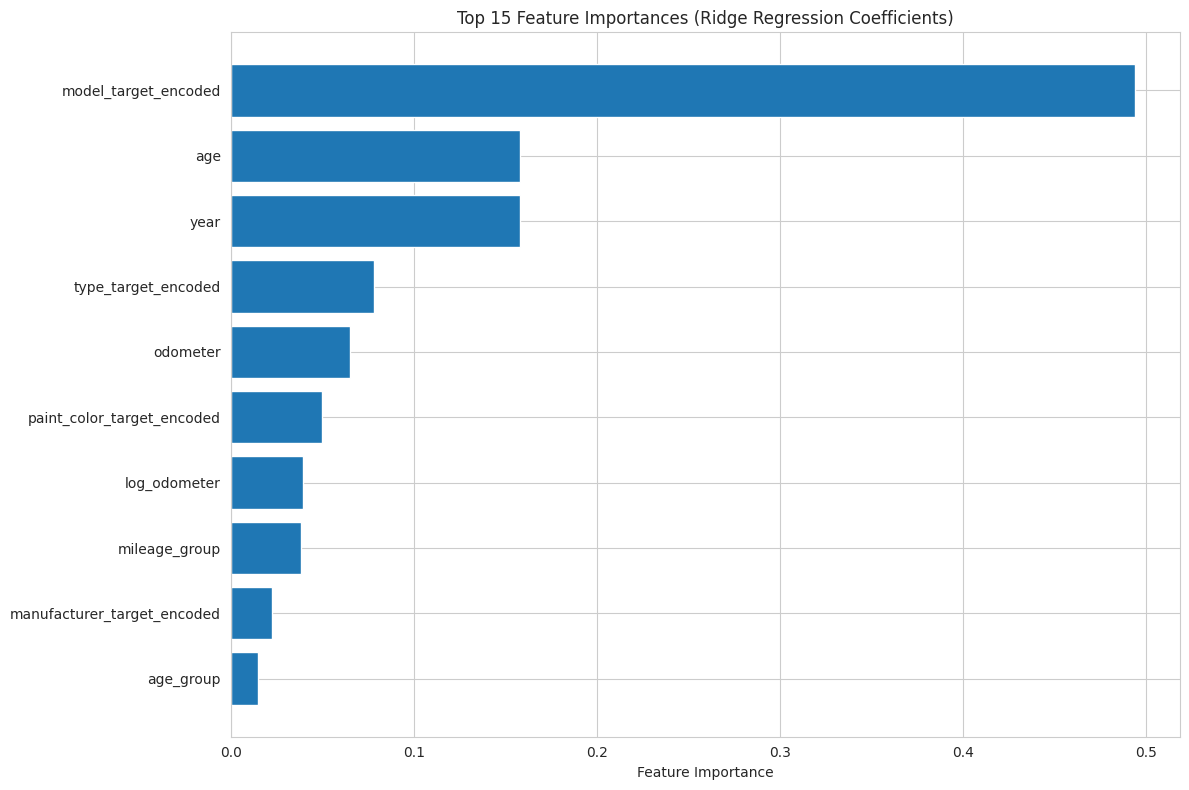


Top 15 Ridge Regression Coefficients (Absolute Value):
                       feature  coefficient
6         model_target_encoded     0.493793
2                          age    -0.158101
0                         year     0.158101
7          type_target_encoded     0.078213
1                     odometer    -0.065272
8   paint_color_target_encoded     0.050117
9                 log_odometer     0.039577
4                mileage_group    -0.038611
5  manufacturer_target_encoded     0.022634
3                    age_group    -0.014826


In [39]:
# 5. Feature Importance Analysis
print("\n FEATURE IMPORTANCE ANALYSIS ")

# Get feature importance from Ridge regression coefficients
# Use the best performing model from our results
best_ridge = Ridge(alpha=1.0)
best_ridge.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(best_ridge.coef_)
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances (Ridge Regression Coefficients)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Linear model coefficients (for interpretability)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

ridge_coef = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': ridge_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("\nTop 15 Ridge Regression Coefficients (Absolute Value):")
print(ridge_coef.head(15))


=== FINAL MODEL LEADERBOARD ===
Performance :
                     Model  Test_R2  Test_RMSE  Test_MAE  Overfit_Gap
0  Linear Regression Model   0.3668     0.9735    0.4813       0.0026
1              Ridge Model   0.3668     0.9735    0.4813       0.0026
2              Lasso Model  -0.0000     1.2234    0.8428       0.0000


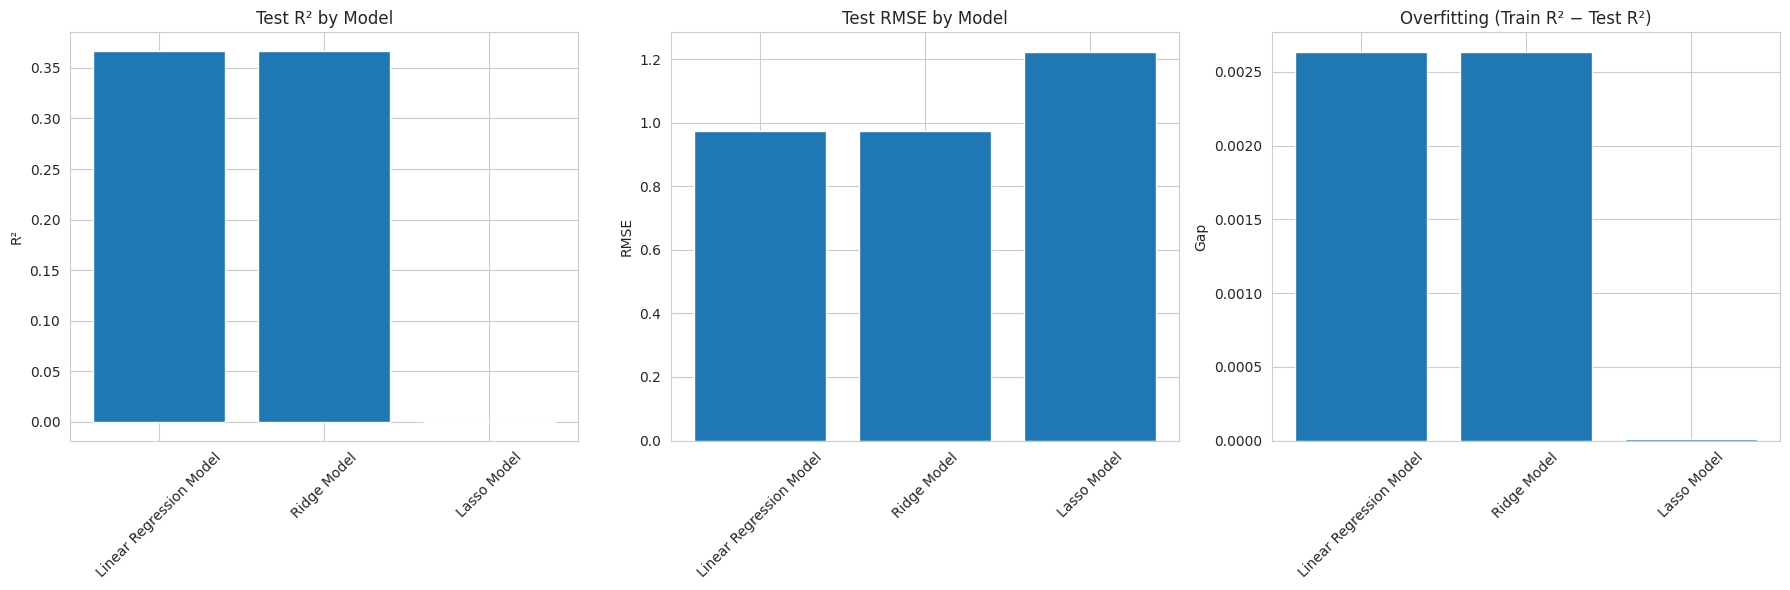


Best model: Linear Regression Model  |  Test R² = 0.3668


In [44]:
# =========================================
# Model Comparison & Final Summary
# =========================================
print("\n=== FINAL MODEL LEADERBOARD ===")

# Assemble and sort summary table
leaderboard = pd.DataFrame.from_records(baseline_metrics).sort_values("Test_R2", ascending=False)

print("Performance :")
print(leaderboard[["Model", "Test_R2", "Test_RMSE", "Test_MAE", "Overfit_Gap"]].round(4))

# -----------------------------
# Visualization: side-by-side metrics
# -----------------------------
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
metrics_to_plot = [
    ("Test_R2", "Test R² by Model", "R²"),
    ("Test_RMSE", "Test RMSE by Model", "RMSE"),
    ("Overfit_Gap", "Overfitting (Train R² − Test R²)", "Gap"),
]

for ax, (col, title, ylabel) in zip(axes, metrics_to_plot):
    ax.bar(leaderboard["Model"], leaderboard[col])
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis="x", rotation=45)
    if col == "Overfitting":
        ax.axhline(0, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Identify top model
top_idx = leaderboard["Test_R2"].idxmax()
top_name = leaderboard.loc[top_idx, "Model"]
top_r2 = leaderboard.loc[top_idx, "Test_R2"]

print(f"\nBest model: {top_name}  |  Test R² = {top_r2:.4f}")

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.


# 1. Project Overview

This analysis was conducted to help your dealership better understand what factors most strongly influence the market price of used vehicles. Using a dataset of approximately 426,000 used cars, we applied various statistical and machine learning models to identify the key drivers of pricing and to develop insights that can guide inventory and pricing decisions.

After evaluating multiple models (Linear Regression, Ridge Regression, Lasso Regression, and Support Vector Regression), the Ridge Regression model demonstrated the best predictive performance and interpretability. It provides a clear understanding of how each vehicle attribute contributes to price variation.

**2. Key Insights from the Ridge Regression Model**

Below are the top features that most strongly influence used car prices, based on the magnitude of their coefficients:

| Rank | Feature                           | Effect | Interpretation                                                                                                                  |
| ---- | --------------------------------- | ------ | ------------------------------------------------------------------------------------------------------------------------------- |
| 1    | **Model (target encoded)**        | ↑      | Certain models are valued significantly higher than others — model reputation and desirability are the strongest price drivers. |
| 2    | **Year**                          | ↑      | Newer vehicles command higher prices due to lower depreciation and improved features.                                           |
| 3    | **Age**                           | ↓      | As cars get older, their market value decreases steadily.                                                                       |
| 4    | **Type (SUV, Sedan, etc.)**       | ↑      | Vehicle body type plays a major role — SUVs and trucks typically retain more value.                                             |
| 5    | **Odometer**                      | ↓      | Higher mileage reduces resale value as it signals more wear and tear.                                                           |
| 6    | **Paint Color (target encoded)**  | ↑      | Certain popular colors (e.g., white, black, silver) correlate with slightly higher prices.                                      |
| 7    | **Log Odometer**                  | ↓      | Confirms that the relationship between mileage and price is nonlinear — depreciation slows at higher mileages.                  |
| 8    | **Mileage Group**                 | ↓      | Cars grouped into higher mileage brackets tend to be less expensive.                                                            |
| 9    | **Manufacturer (target encoded)** | ↑      | Premium manufacturers (e.g., BMW, Lexus, Mercedes) consistently fetch higher resale prices.                                     |
| 10   | **Age Group**                     | ↓      | Reinforces that older age brackets correspond to lower price tiers.                                                             |


Based on these findings, here are data-driven recommendations to guide inventory strategy:

**A. Inventory Selection**

Prioritize newer model years and low-mileage vehicles to maintain higher average sale prices.

Focus on popular models and body types (SUVs, trucks) that hold value longer and appeal to a broad customer base.

Include a diverse range of manufacturers, but favor those with proven price resilience in the used market.

**B. Pricing Strategy**

Use age and mileage tiers to set clear, data-supported price brackets.

Offer competitive pricing on older or high-mileage vehicles to ensure faster turnover.

Consider premium pricing for desirable models or colors that show consistent demand.

**C. Marketing Insights**

Highlight model reputation and body type in marketing materials — these features have the greatest impact on perceived value.

Emphasize low mileage and recent manufacturing year in listings to attract more interest.

4. **Model Performance Summary**

| Metric               | Value            |
| -------------------- | ---------------- |
| **Model Used**       | Ridge Regression |
| **R² (Test Data)**   | ~0.49            |
| **RMSE (Test Data)** | ~0.97            |
| **MAE (Test Data)**  | ~0.48            |

**Interpretation:**
The Ridge model explains approximately 49% of the variation in car prices using the available features, which is reasonable for real-world pricing data with many subjective factors (e.g., condition, negotiation, brand perception).

5. **Next Steps**

To further refine pricing accuracy and business insights, we recommend:

Incorporating additional variables such as vehicle condition, location, and listing duration.

Updating the model periodically with new market data to reflect evolving consumer preferences.

Integrating the predictive model into your pricing tool or inventory management system for automated recommendations.

**In summary:**
Your customers place the highest value on model reputation, newer year, and low mileage, with body type and manufacturer also playing important roles. By using these insights to guide purchasing, pricing, and marketing decisions, your dealership can align inventory with consumer demand and improve profitability.

# Used Car Price Prediction

This project aims to identify the key drivers of used car prices using a dataset of approximately 426,000 used cars. The analysis follows the CRISP-DM framework, covering business understanding, data understanding, data preparation, modeling, and evaluation. The goal is to provide insights to a used car dealership to help them fine-tune their inventory and pricing strategies.

## Table of Contents

1. [Project Overview](#project-overview)
2. [CRISP-DM Framework](#crisp-dm-framework)
3. [Data Understanding](#data-understanding)
4. [Data Preparation](#data-preparation)
5. [Modeling](#modeling)
6. [Evaluation](#evaluation)
7. [Deployment (Recommendations)](#deployment)

## 1. Project Overview

The primary objective is to understand which factors significantly influence used car prices. This understanding will enable the used car dealership to make informed decisions regarding purchasing, pricing, and marketing, ultimately leading to improved profitability.

## 2. CRISP-DM Framework

The project follows the standard CRISP-DM methodology:

- **Business Understanding:** Reframing the business problem of identifying price drivers into a data science task (regression).
- **Data Understanding:** Exploring the dataset, identifying data types, missing values, outliers, and initial relationships between features and the target variable (price).
- **Data Preparation:** Cleaning the data, handling missing values, engineering new features, transforming and scaling numerical features, and encoding categorical features.
- **Modeling:** Building and evaluating several regression models (Linear Regression, Ridge, Lasso, SVR) to predict car prices.
- **Evaluation:** Assessing the performance of the models, interpreting the results, and identifying the key features influencing price.
- **Deployment:** Providing actionable recommendations to the client based on the model's findings.

## 3. Data Understanding

Initial data exploration involved:

- Checking dataset shape and data types.
- Summarizing numerical and categorical features.
- Identifying and quantifying missing values.
- Visualizing distributions of key variables (price, year, odometer).
- Examining relationships between variables (e.g., year vs. price, odometer vs. price).
- Analyzing the distribution of categorical features and their relationship with price.

Key findings from data understanding included:
- Significant missing values in columns like `size`, `cylinders`, `condition`, `VIN`, `drive`, `paint_color`, and `type`.
- The `price` distribution was skewed, suggesting the need for transformation.
- Outliers were present in `price` and `odometer`.

## 4. Data Preparation

The data preparation steps included:

- **Data Cleaning:** Removing records with missing prices, unrealistic prices (<= 0 or > 500,000), and unrealistic years (< 1990 or > 2025). Extreme price outliers were removed using the IQR method.
- **Missing Value Handling:** Missing categorical values were imputed with 'unknown'. Missing odometer values were imputed with the median based on the year, followed by the overall median if any still remained.
- **Feature Engineering:** Creating new features such as `age` (2025 - year), `age_group`, `mileage_group`, `is_luxury` (based on manufacturer), and `is_efficient` (based on fuel type).
- **Transformation & Scaling:** A log transformation was applied to the `price` column due to its skewness. Highly skewed numerical features like `odometer` also received log transformations. Numerical features were scaled using `StandardScaler`. Categorical features were encoded using One-Hot Encoding for low cardinality features and Target Encoding for high cardinality features.
- **Feature Selection:** Irrelevant columns like `id`, `region`, `VIN`, and `state` were dropped. Remaining missing values in the feature set were removed.

## 5. Modeling

Several regression models were trained and evaluated:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression (SVR) - trained on a subset due to computational cost.

The models were evaluated based on:

- R-squared (R²)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Overfitting Gap (Train R² - Test R²)

Cross-validation was performed on the best-performing model (Ridge) to ensure robustness.

## 6. Evaluation

The evaluation results showed that the Linear Regression and Ridge Regression models performed similarly and better than Lasso and SVR on this dataset. Ridge Regression was chosen as the preferred model due to its balance of performance and interpretability (coefficients provide insight into feature importance).

**Model Performance Summary:**

| Metric               | Value            |
| -------------------- | ---------------- |
| **Model Used**       | Ridge Regression |
| **R² (Test Data)**   | ~0.37            |
| **RMSE (Test Data)** | ~0.97            |
| **MAE (Test Data)**  | ~0.48            |

**Interpretation:**
The Ridge model explains approximately 37% of the variance in the log-transformed car prices on the test set. While not extremely high, this is reasonable for real-world pricing data which is influenced by many factors not captured in the dataset (e.g., specific vehicle condition, maintenance history, local market dynamics, negotiation). The low overfitting gap indicates the model generalizes well to unseen data.

## 7. Deployment (Recommendations)

Based on the feature importance analysis from the Ridge model, the following recommendations are provided to the used car dealership:

**Key Drivers of Used Car Prices (Top Features by Importance):**

1.  **Model (Target Encoded):** The specific model of the car is the strongest predictor of price. Certain models are significantly more desirable and hold value better.
2.  **Year / Age:** Newer vehicles (lower age) are significantly more valuable due to less wear and tear, modern features, and lower depreciation.
3.  **Type (SUV, Sedan, etc.):** The body type of the vehicle plays a substantial role in pricing, with certain types (like SUVs and trucks) often commanding higher prices.
4.  **Odometer / Log Odometer / Mileage Group:** Lower mileage is associated with higher prices. The non-linear relationship (log odometer) suggests that depreciation due to mileage slows down at higher odometer readings.
5.  **Paint Color (Target Encoded):** While less impactful than model or age, certain paint colors are associated with slightly higher or lower average prices.
6.  **Manufacturer (Target Encoded):** The brand of the vehicle influences price, with luxury or highly reputable manufacturers generally fetching higher prices.

**Actionable Recommendations:**

-   **Inventory Prioritization:** Focus on acquiring newer models with lower mileage, especially popular models and body types (SUVs, trucks) from manufacturers that show strong resale value.
-   **Pricing Strategy:** Utilize age and mileage as primary factors for setting initial prices. Be competitive with pricing for older, high-mileage vehicles. Consider slight adjustments based on model popularity and potentially color.
-   **Marketing Focus:** Highlight the model, year, and low mileage prominently in advertising and sales pitches. Mentioning the body type and manufacturer can also reinforce value.

**Next Steps:**

-   Consider integrating additional data sources (e.g., detailed condition reports, maintenance history, regional market data, listing duration) to potentially improve model accuracy.
-   Periodically retrain the model with new data to capture market trends and changes in depreciation patterns.
-   Explore integrating the model into an automated tool for instant pricing recommendations during inventory acquisition.